In [ ]:
import torch
import torch.nn as nn # ALL neural network modules, nn.Linear, nn.Conv2d, Batch
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # ALL functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and cri
import torchvision.datasets as datasets # Has standard datasets we can import
import torchvision.transforms as transforms # Transformations we can perform on
import matplotlib.pyplot as plt
import torchvision
class my_model(nn.Module):
    def __init__(self):
        super(my_model, self).__init__()
        self.fc2 = nn.Linear(128, 10)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(10816, 128)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
mod = my_model()

In [ ]:
input_size = 784 # 28x28 = 784, size of MNIST images (grayscale)
num_classes = 10
batch_size = 64
train_dataset = datasets.MNIST( 
    root="dataset/",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)
print(len(train_dataset) , 'length of the train dataset')

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(
    root="dataset/",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)
print(len(test_dataset) , 'length of the test dataset')

test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True
)

60000 length of the train dataset
10000 length of the test dataset


tensor([5, 2, 5, 1, 8, 4, 5, 7, 3, 1, 6, 8, 1, 0, 3, 9, 0, 2, 8, 8, 8, 5, 1, 1,
        8, 5, 2, 7, 1, 8, 6, 8, 4, 7, 5, 7, 9, 4, 6, 5, 8, 5, 3, 8, 2, 7, 5, 4,
        1, 7, 9, 9, 7, 2, 1, 6, 1, 6, 4, 6, 3, 8, 7, 5])


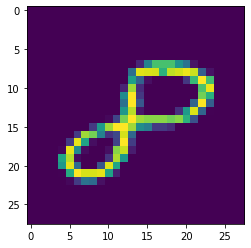

In [ ]:
it = iter(train_loader)

images , labels = it.next()

plt.imshow(images[4][0])
print(labels)



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rate = 0.001
num_epochs = 3
model = my_model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print(model(torch.randn(64,1,28,28)).shape)

torch.Size([64, 10])


In [ ]:
all_loss = []
for epoch in range(10):
    print(f"Epoch: {epoch}")
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        scores = model(data) 
        loss = criterion(scores, targets)
        all_loss.append(loss)
        optimizer.zero_grad()   
        print(batch_idx,loss.item())
        loss.backward()
        optimizer.step()

Streaming output truncated to the last 5000 lines.
633 0.011889288201928139
634 0.0028219681698828936
635 0.018895000219345093
636 0.007141115143895149
637 0.051706280559301376
638 0.02104824222624302
639 0.05142878368496895
640 0.1661246120929718
641 0.0009812784846872091
642 0.004526394885033369
643 0.0012108369264751673
644 0.005112938582897186
645 0.0037409565411508083
646 0.0015798343811184168
647 0.035470034927129745
648 0.03133493661880493
649 0.0008431038004346192
650 0.003050885396078229
651 0.00026809200062416494
652 0.01104492787271738
653 0.0398288369178772
654 0.027774382382631302
655 0.1362999528646469
656 0.00041297986172139645
657 0.061686646193265915
658 0.0025742158759385347
659 0.0038466781843453646
660 0.00786483846604824
661 0.0757618173956871
662 0.002374246483668685
663 0.00674368254840374
664 0.030767347663640976
665 0.016188228502869606
666 0.0004430035187397152
667 0.0019357162527740002
668 0.0006555219297297299
669 0.00696162274107337
670 0.011995324864983559

In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
#             x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
            f"Got {num_correct} / {num_samples} with accuracy"
            f" {float(num_correct) / float(num_samples) * 100:.2f}"
        )

    model.train()

In [ ]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Got 59873 / 60000 with accuracy 99.79
Got 9882 / 10000 with accuracy 98.82
